# Goal
Optimasi terhadap campaign result yang terkait dengan penawaran produk terbaru, shingga akan mendapatakan profit yang maksimal di bulan depan dan memahami karakteristik customer yang menerima penawaran tersebut



# Data Quality
1. Apakah ada features yang data type-nya tidak sesuai?

2. Adakah duplicate, missing values atau outliers?

3. Apakah terdapat distribusi yang tidak masuk akal?

Bagaimana mengatasi hal-hal tersebut?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings #-> agar tidak ada warning yang diberikan pandas dll
warnings.filterwarnings('ignore')

In [2]:
dataset = "marketing_data.csv"
df = pd.read_csv(dataset)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 1. Question 1
Apakah ada features yang data type-nya tidak sesuai?
1. Income = Seharusnya Float atau Integer
2. Dt_Customer = Seharusnya Date


In [3]:
df.columns = df.columns.str.replace(' ','')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# cara 2 agar tau data typenya sesuai 

In [6]:
summary = pd.DataFrame({
    'Kolom': df.columns,
    'Tipe Data': df.dtypes.values,
    'Contoh_Value': df.iloc[0].values,
})

summary

,Kolom,Tipe Data,Contoh_Value
0,ID,int64,1826
1,Year_Birth,int64,1970
2,Education,object,Graduation
3,Marital_Status,object,Divorced
4,Income,object,"$84,835.00"
5,Kidhome,int64,0
6,Teenhome,int64,0
7,Dt_Customer,object,6/16/14
8,Recency,int64,0
9,MntWines,int64,189


### 1.1 Menghapus tanda $ pada kolom income

In [7]:
# Hapus tanda $ pada data di kolom Income
df['Income'] = df['Income'].str.replace('$','')

In [8]:
#hilangkan komanya
df['Income'] = df['Income'].str.replace(',','')

In [9]:
# Hilangkan spasinya untuk mengantisapiasi spasi ganda setelah menghilangkan $
df['Income'] = df['Income'].str.replace(' ','')

In [10]:
# Ubah data di Kolom Income jadi Float
df['Income'] = df['Income'].astype(float)

## 1.2 Mengubah tipe data dt customer 

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# 2 Question 2
Adakah duplicate, missing values atau outliers?

## 2.1 Duplicate

In [12]:
df.duplicated().sum()

np.int64(0)

0 = artinya tidak ada duplikat

## 2.2 Missing Value

In [13]:
# missing value per kolom
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
Education               0
Year_Birth              0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

 Jika ingin mengisi missing values ini kita dapat mengisinya dengan mean atau median 

## Mean vs Median

melihan distribusi dari si income ini dnegan visualisasi

<Axes: xlabel='Income'>

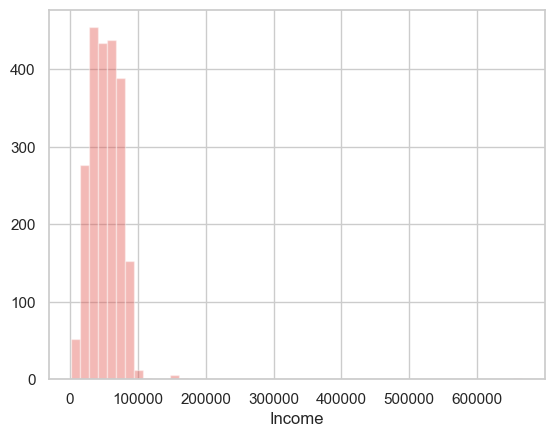

In [14]:
# vara 1
sns.distplot(df['Income'],kde=False, hist=True)

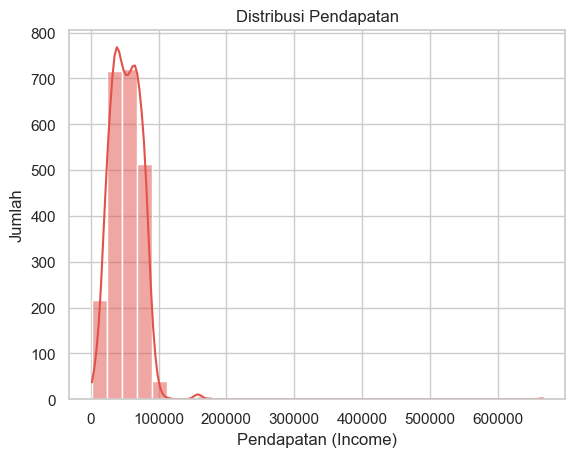

In [15]:
#cara 2
sns.histplot(df['Income'],bins=30,kde=True)
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Jumlah')
plt.show()

## 2.3 Outlier

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [17]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns= ['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                              'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],inplace=True)

Year_Birth                Axes(0.125,0.712609;0.168478x0.167391)
Income                 Axes(0.327174,0.712609;0.168478x0.167391)
Kidhome                Axes(0.529348,0.712609;0.168478x0.167391)
Teenhome               Axes(0.731522,0.712609;0.168478x0.167391)
Recency                   Axes(0.125,0.511739;0.168478x0.167391)
MntWines               Axes(0.327174,0.511739;0.168478x0.167391)
MntFruits              Axes(0.529348,0.511739;0.168478x0.167391)
MntMeatProducts        Axes(0.731522,0.511739;0.168478x0.167391)
MntFishProducts            Axes(0.125,0.31087;0.168478x0.167391)
MntSweetProducts        Axes(0.327174,0.31087;0.168478x0.167391)
MntGoldProds            Axes(0.529348,0.31087;0.168478x0.167391)
NumDealsPurchases       Axes(0.731522,0.31087;0.168478x0.167391)
NumWebPurchases               Axes(0.125,0.11;0.168478x0.167391)
NumCatalogPurchases        Axes(0.327174,0.11;0.168478x0.167391)
NumStorePurchases          Axes(0.529348,0.11;0.168478x0.167391)
NumWebVisitsMonth        

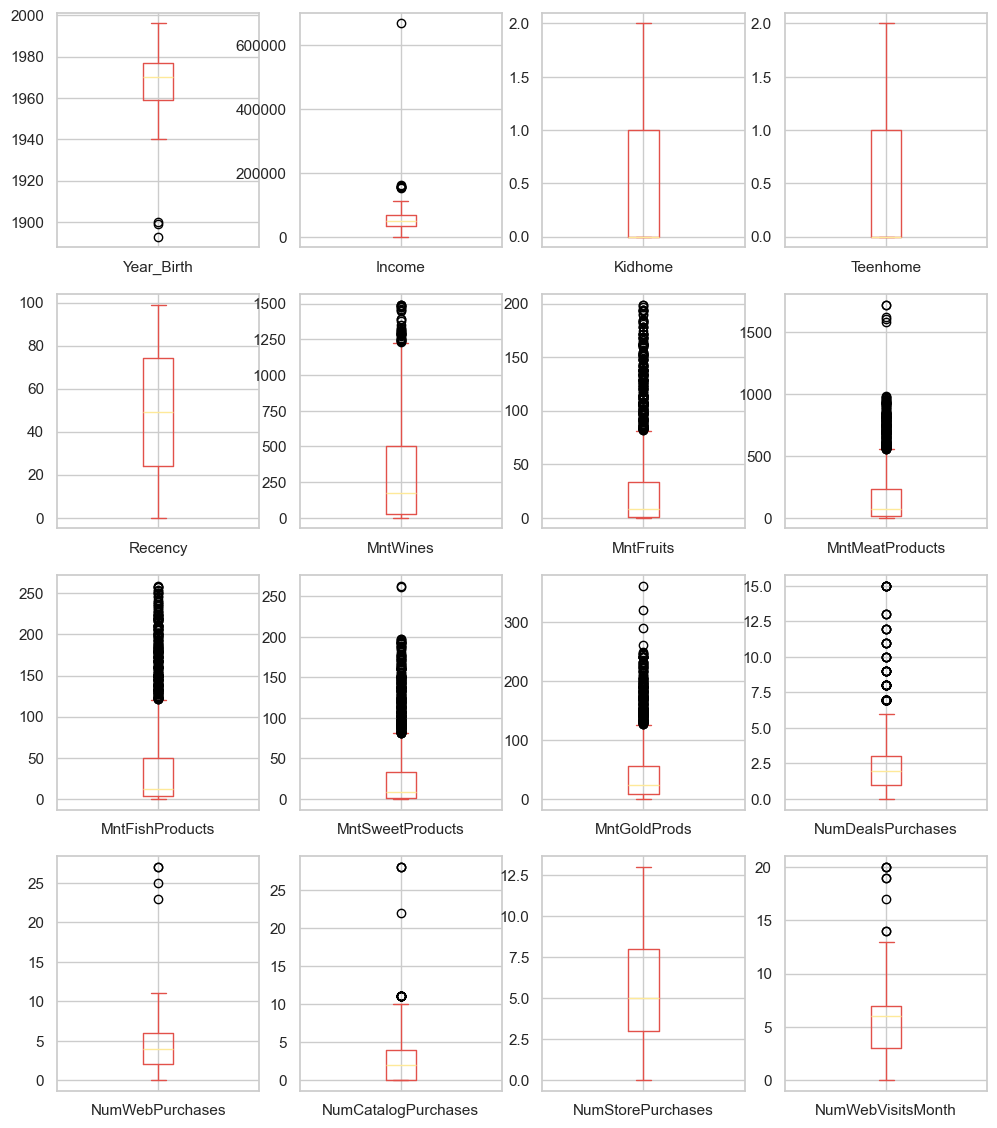

In [18]:
df_to_plot.plot(subplots=True, layout=(4,4),kind='box', figsize=(12,14))


In [19]:
# remove orang yang lahir tahun 1900 karena tidak masuk akal 
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

# Question 3
Apakah terdapat ditribusi yang tidak masuk akal

In [20]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

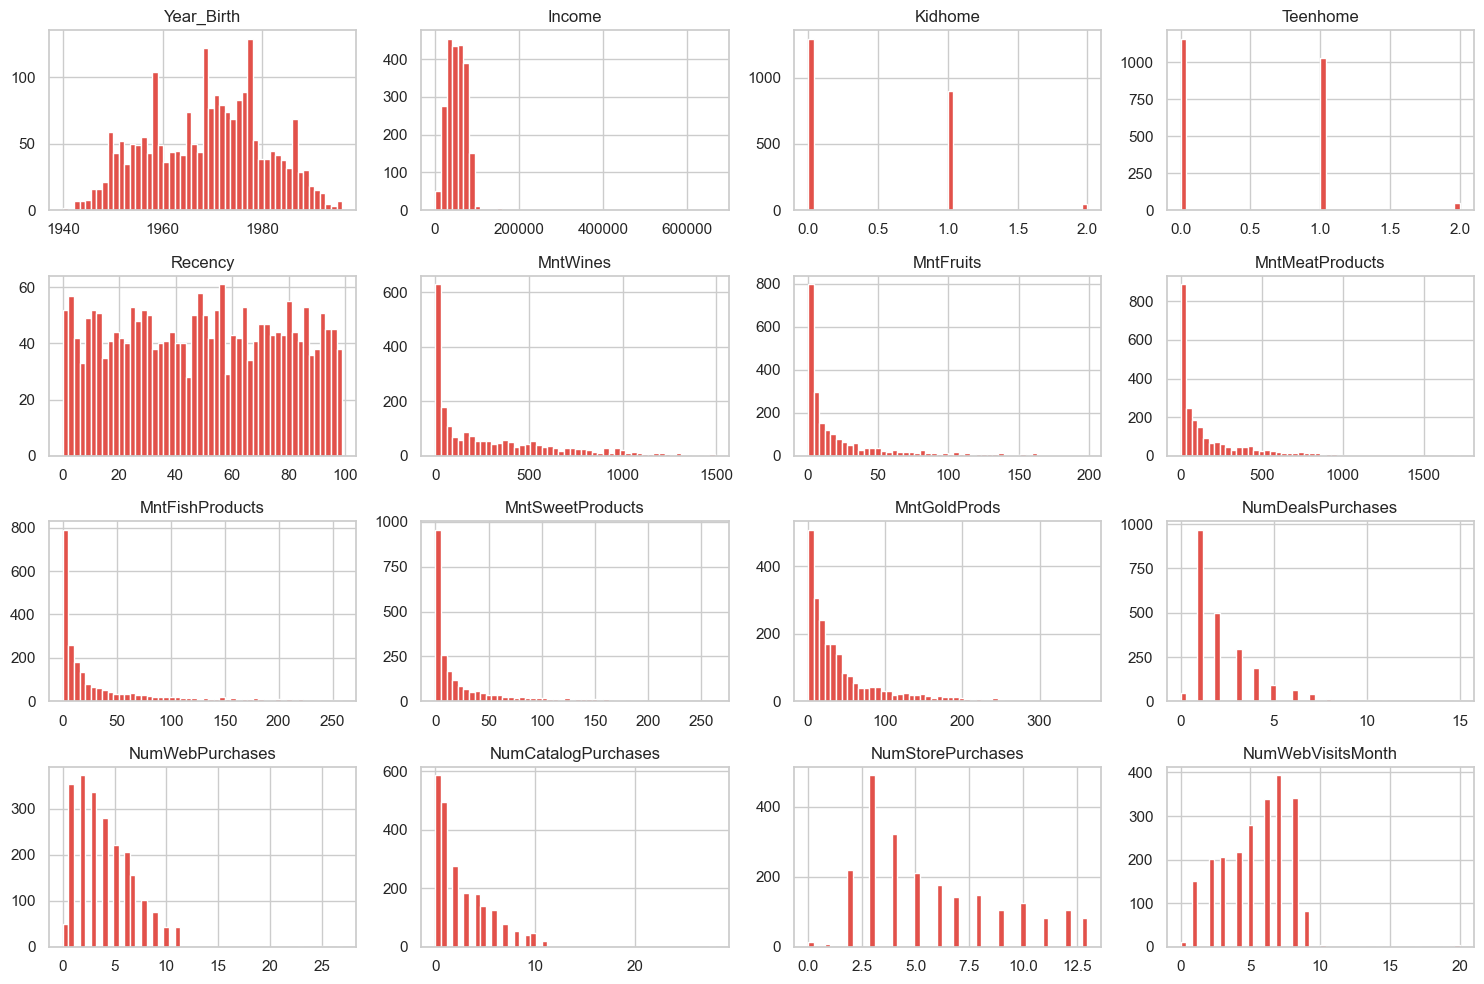

In [21]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50,ax=ax,layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# Data Insight

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 1.Year Birth
Rentang Umur berapa yang paling banyak menerima penawaran produk (respon = 1)

In [23]:
# Mengambil Year pada kolom dt_customer
year_now = df['Dt_Customer'].dt.year

# Umur dari kliean ketika mereka pertama kali / membeli suatu barang
year_now - df['Year_Birth']

0       44
1       53
2       56
3       47
4       25
        ..
2232    37
2233    36
2234    36
2235    34
2236    43
Length: 2237, dtype: int64

In [24]:
# membuat kolom Customer Age
df['Customer_Age'] = year_now - df['Year_Birth']

<Axes: xlabel='Customer_Age', ylabel='Count'>

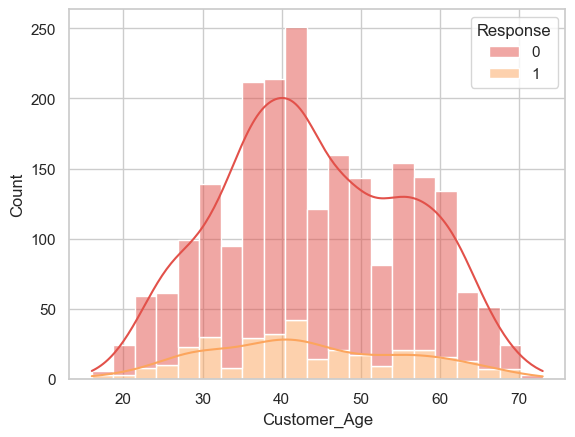

In [25]:
# Visualisasi dengan histogram

sns.histplot(data=df, x='Customer_Age', hue='Response',multiple='stack',kde=True)

## 2. Education
Customer kita ini paling banyak dari edukasi mana ya?

In [26]:
# cari nilai unique kolom education
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

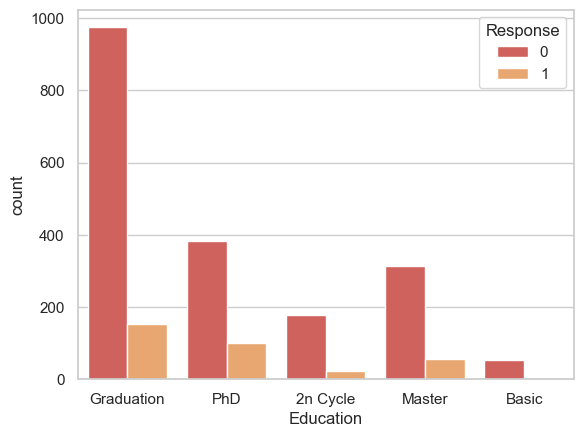

In [27]:
sns.countplot(data=df,x='Education',hue='Response')

(0.0, 175000.0)

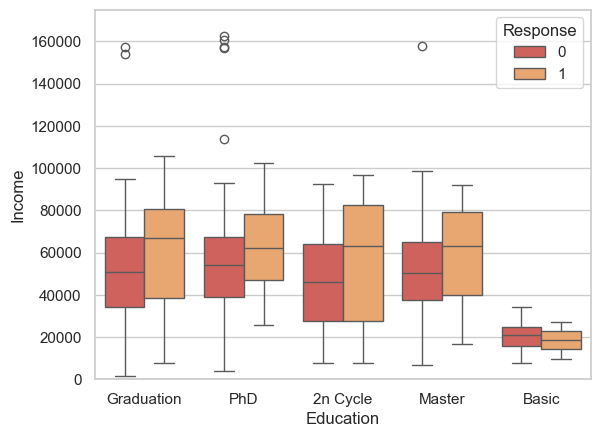

In [28]:
sns.boxplot(data=df,x='Education',y='Income',hue='Response')
plt.ylim(0,175000)

# Income yang lebih tinggi cenderung menerima/ membeli penawaran campaign

## 3. Marital_Status
Customer kita ini bagaimana status di kehidupannya dan bagiaman respon mereka ?


In [29]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [30]:
# merubah yolo,alone,absurd jadi single
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))

In [31]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

<Axes: xlabel='Marital_Status', ylabel='count'>

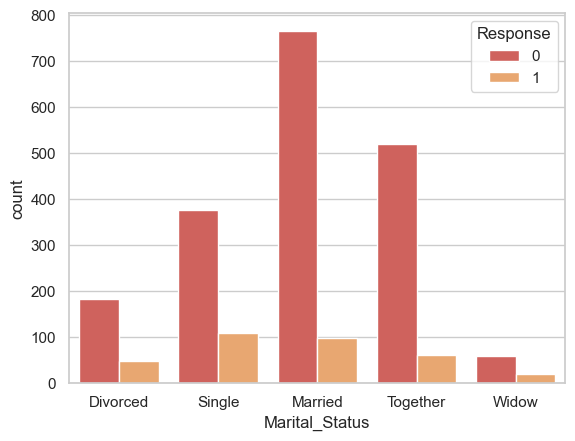

In [34]:
# visualisasi
sns.countplot(data=df,x='Marital_Status',hue='Response')

In [ ]:
# Orang orang yang tinggal sendiri/membiayai sendiri hidupnya cenderung untuk menerima penawaran produk campaign

## 4. Kidhome + Teenhome( Jumlah anak atau orang di rumah/tanggungan)

In [38]:
# membuat kolom baru untuk Kidhome + Teenhomeyaitu kolom num_dependen

df['Num_Dependen'] = df['Kidhome'] + df['Teenhome'] 

<Axes: xlabel='Num_Dependen', ylabel='count'>

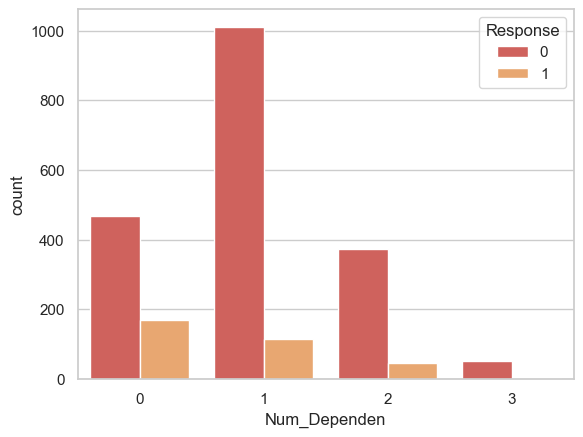

In [39]:
# visualisasi
sns.countplot(data=df,x='Num_Dependen',hue='Response')

In [ ]:
# Customer yang tidak memiliki anak/ tanggungan cenderung menerima penawaran produk(campaign)


## 5. Customer join date

In [40]:
# membuat kolom baru scustomer month dan year
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year


<Axes: xlabel='Dt_Customer_Month', ylabel='count'>

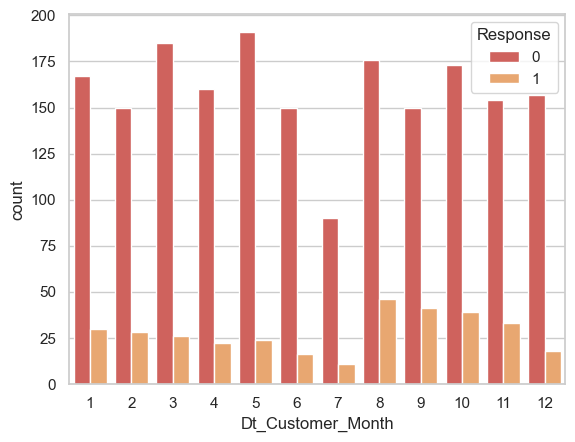

In [41]:
# visualisasikan
sns.countplot(data=df, x='Dt_Customer_Month',hue='Response')

<Axes: xlabel='Dt_Customer_Year', ylabel='count'>

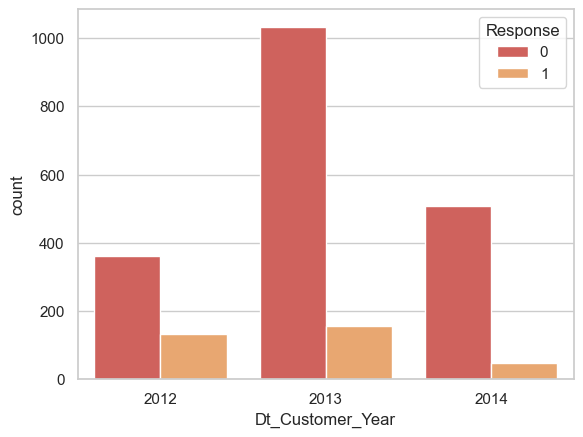

In [42]:
sns.countplot(data=df, x='Dt_Customer_Year',hue='Response')

In [ ]:
# semakin lama tahun custmer kita join maka semakin besar k=customer menerima penawaran campaign produk terbaru

## 6. Recency

<Axes: xlabel='Recency', ylabel='Count'>

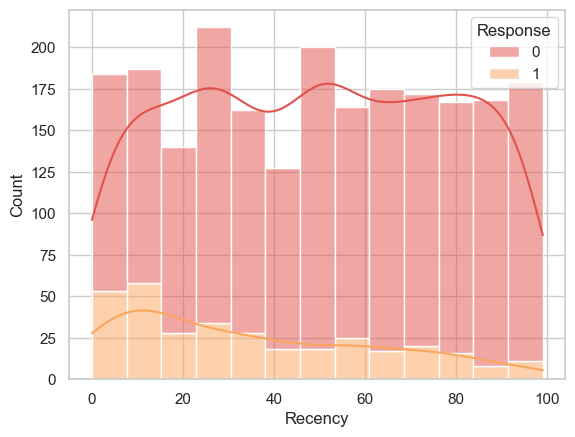

In [36]:
sns.histplot(data=df,x='Recency', hue='Response', multiple='stack', kde=True)

In [43]:
# customer yang belum lama membeli, maka cenderung menerima penawaran campaign terbaru

## 7. Amount Spent

In [47]:
amt_spend_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spend_features.append('Response')

In [48]:
df[amt_spend_features].corr()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
MntWines,1.000000,0.388518,0.561993,0.399073,0.385992,0.386376,0.247392
MntFruits,0.388518,1.000000,0.542057,0.594438,0.567054,0.390042,0.125904
MntMeatProducts,0.561993,0.542057,1.000000,0.567880,0.523418,0.348845,0.236640
MntFishProducts,0.399073,0.594438,0.567880,1.000000,0.579553,0.422103,0.111415
MntSweetProducts,0.385992,0.567054,0.523418,0.579553,1.000000,0.369193,0.117366
MntGoldProds,0.386376,0.390042,0.348845,0.422103,0.369193,1.000000,0.140693
Response,0.247392,0.125904,0.236640,0.111415,0.117366,0.140693,1.000000
